# Predicting Heart Disease 

The World Health Organization (WHO) estimates that 17.9 million people die every year because of cardiovascular diseases (CVDs).

Cardiovascular diseases (CVDs) are a major cause of death worldwide, killing millions of people every year. Identifying risk factors for CVD can contribute to early detection and prevention, potentially saving lives. Our goal in this work is to analyze anonymous patient data collected from multiple hospitals to predict the likelihood of a new patient developing cardiovascular disease in the future. The list includes individual medical characteristics such as age, sex, blood pressure and cholesterol levels.

In this project, we will use the <a href="https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction">Kaggle dataset</a> and build a K-Nearest Neighbors classifier to accurately predict the likelihood of a patient having a heart disease in the future

# Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# EDA: Descriptive Statistics

We will start with exploring our dataset. As per the source, each patient has the following information collected about them:

1. `Age`: age of the patient [years]
2. `Sex`: sex of the patient [M: Male, F: Female]
3. `ChestPainType`: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. `RestingBP`: resting blood pressure [mm Hg]
5. `Cholesterol`: serum cholesterol [mm/dl]
6. `FastingBS`: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. `RestingECG`: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. `MaxHR`: maximum heart rate achieved [Numeric value between 60 and 202]
9. `ExerciseAngina`: exercise-induced angina [Y: Yes, N: No]
10. `Oldpeak`: oldpeak = ST [Numeric value measured in depression]
11. `ST_Slope`: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. `HeartDisease`: output class [1: heart disease, 0: Normal]

In [4]:
#load the dataset
df=pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
#Display the first five rows of the dataframe.
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
#Print out the number of features and observations in the dataset.
df.shape

(918, 12)

The dataset seems to contain both numerical and categorical features. Let's look at the datatype for each column.

In [7]:
print(df.dtypes)
df.dtypes.value_counts()

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


int64      6
object     5
float64    1
dtype: int64

`7` features in total are numerical while `5` are categorical. However, two of the numerical features, `FastingBS` and `HeartDisease` are categorical as well.

We will start by exploring and analyzing the numerical columns.

In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Based on the descriptive statistics, here are some of the observations that we can make:

* The average age of patients is ~53 years.
* The median for Cholesterol is higher than its mean by roughly 25 mm/dl, indicating that it could be a left-skewed distribution with a possibility of outliers skewing the distribution.
* RestingBP and Cholesterol have a minimum value of zero.
* There don't seem to be any missing values in these columns.

`RestingBP` can't be 0. And, as per the <a href="https://www.heart.org/en/health-topics/cholesterol/about-cholesterol/what-your-cholesterol-levels-mean"> American Heart Association</a>, serum cholesterol is a composite of different measurements. So, it is unlikely that `Cholesterol` would be `0` as well. We will have to clean both of these up later.

Next, we will look at the categorical variables. It would also be beneficial to look at how the target feature, `HeartDisease`, is related to those categories. Before that, let's quickly check if there are any missing values in the dataset or not.

In [9]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing values in this dataset!

# EDA: Categorical Data
We identified that most of the categorical columns are all of dtype object.

In [10]:
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


We can confirm that those columns are indeed categorical given the number of unique values in each of them. But, we can't gather much else. Also, `FastingBS` and `HeartDisease` are categorical as well since they only contain binary values. We can confirm that quickly as well.

In [11]:
df['FastingBS'].unique()

array([0, 1])

In [12]:
df['HeartDisease'].unique()

array([0, 1])

Let's start looking at the categories in more detail.

In [13]:
categorical_columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope','FastingBS','HeartDisease']

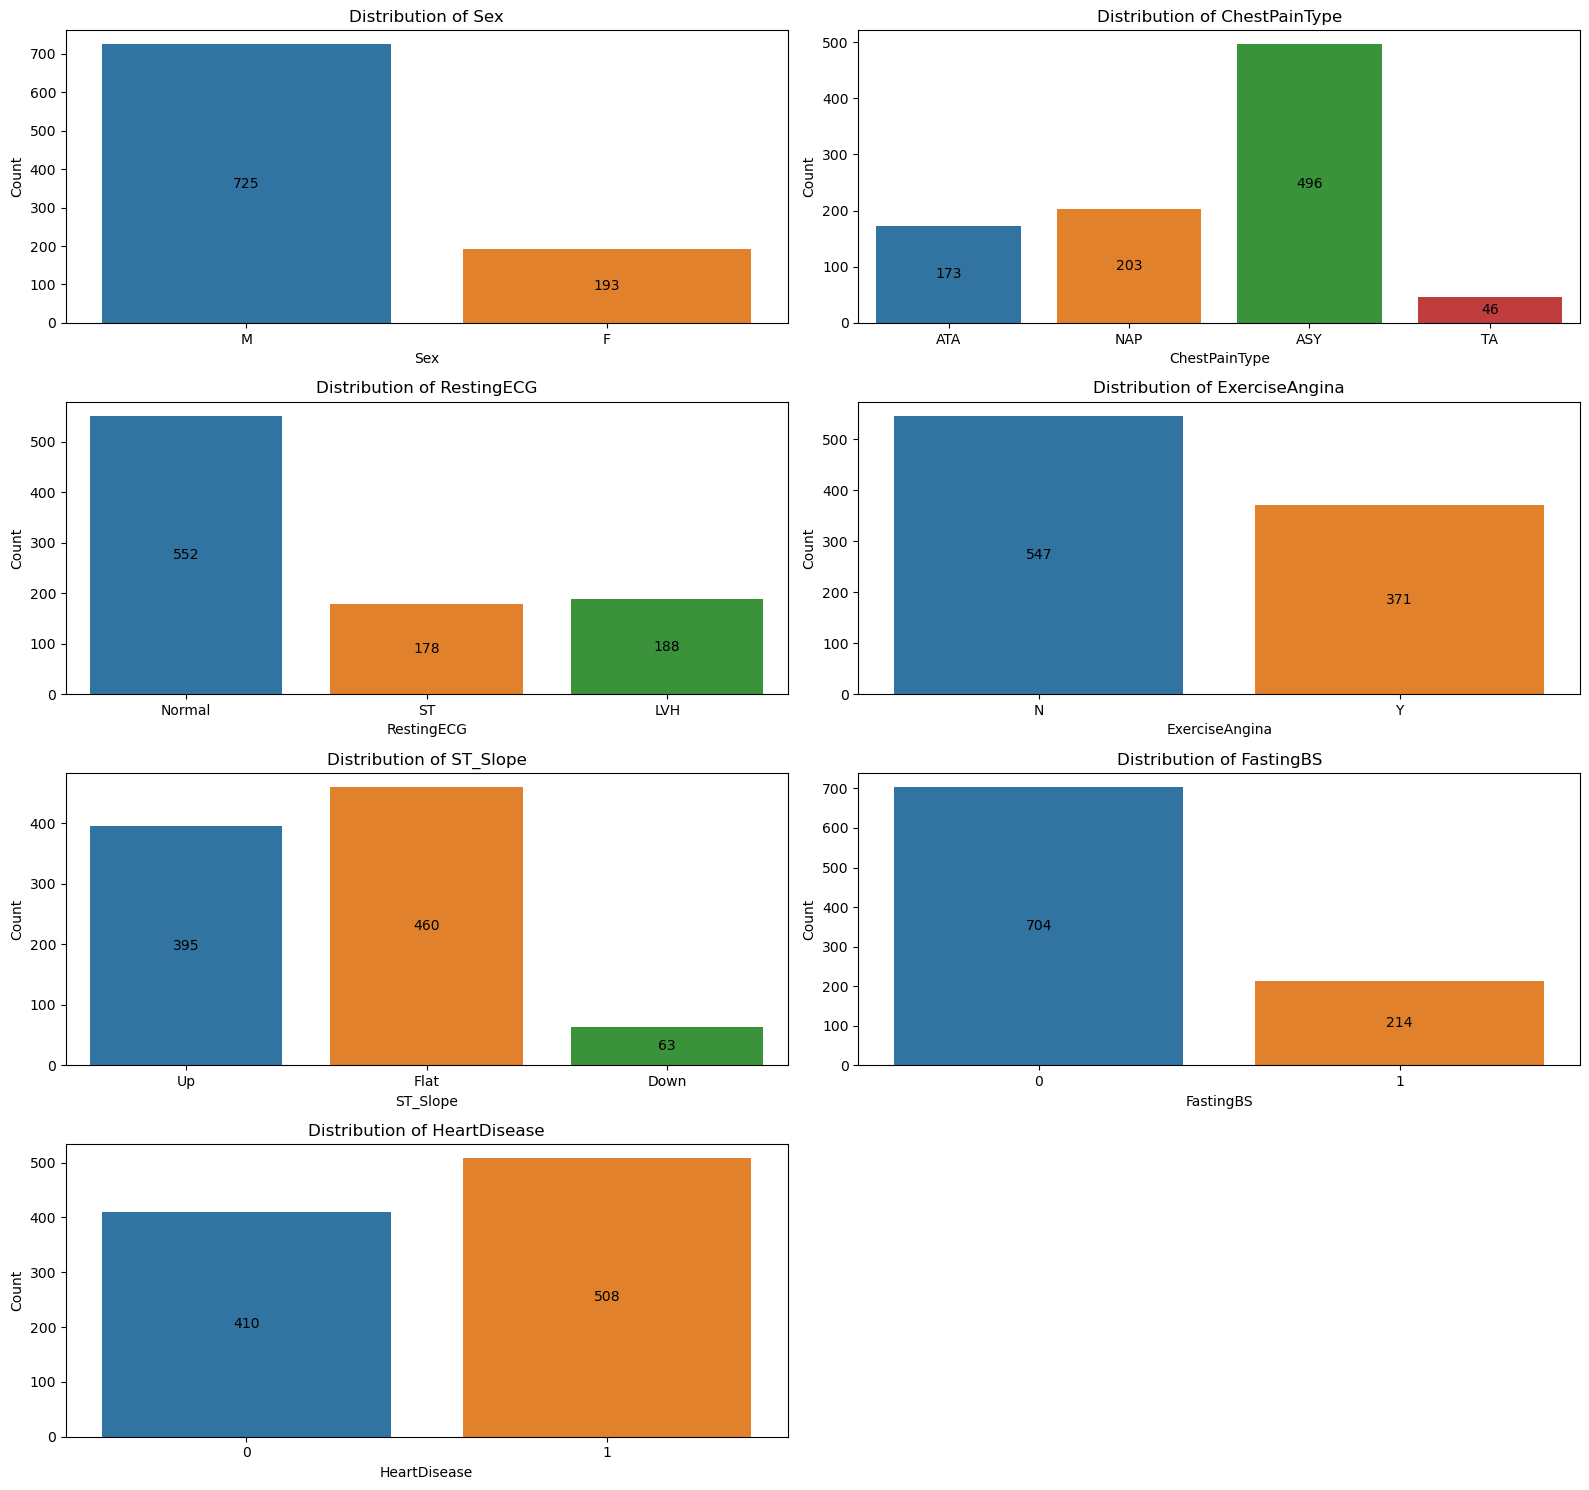

In [14]:
plt.figure(figsize=(16,15))
for index, columns in enumerate(categorical_columns):
    ax=plt.subplot(4,2,index+1)
    sns.countplot(x=df[columns],ax=ax)
    ax.set_title(f'Distribution of {columns}')
    ax.set_xlabel(columns)
    ax.set_ylabel('Count')
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container,label_type='center')
plt.tight_layout()
plt.show()
    

- **Gender Imbalance:** The dataset is skewed towards male patients, with 725 males and 193 females, potentially introducing bias in analyses.
- **Chest Pain Types:** ASY (496), NAP (203), and ATA (173) are the most prevalent chest pain types reported.
- **Resting ECG:** Most patients have a normal ECG (552), while some show LVH (188) or ST-T wave abnormalities (178).
- **Exercise-Induced Angina:** 547 patients didn't experience angina during exercise, while 371 did.
- **Blood Sugar Levels:** 704 patients had fasting blood sugar levels below 120 mg/dl, indicating mostly normal levels.



Grouping these by `HeartDisease` will give us a better idea about the data distribution.

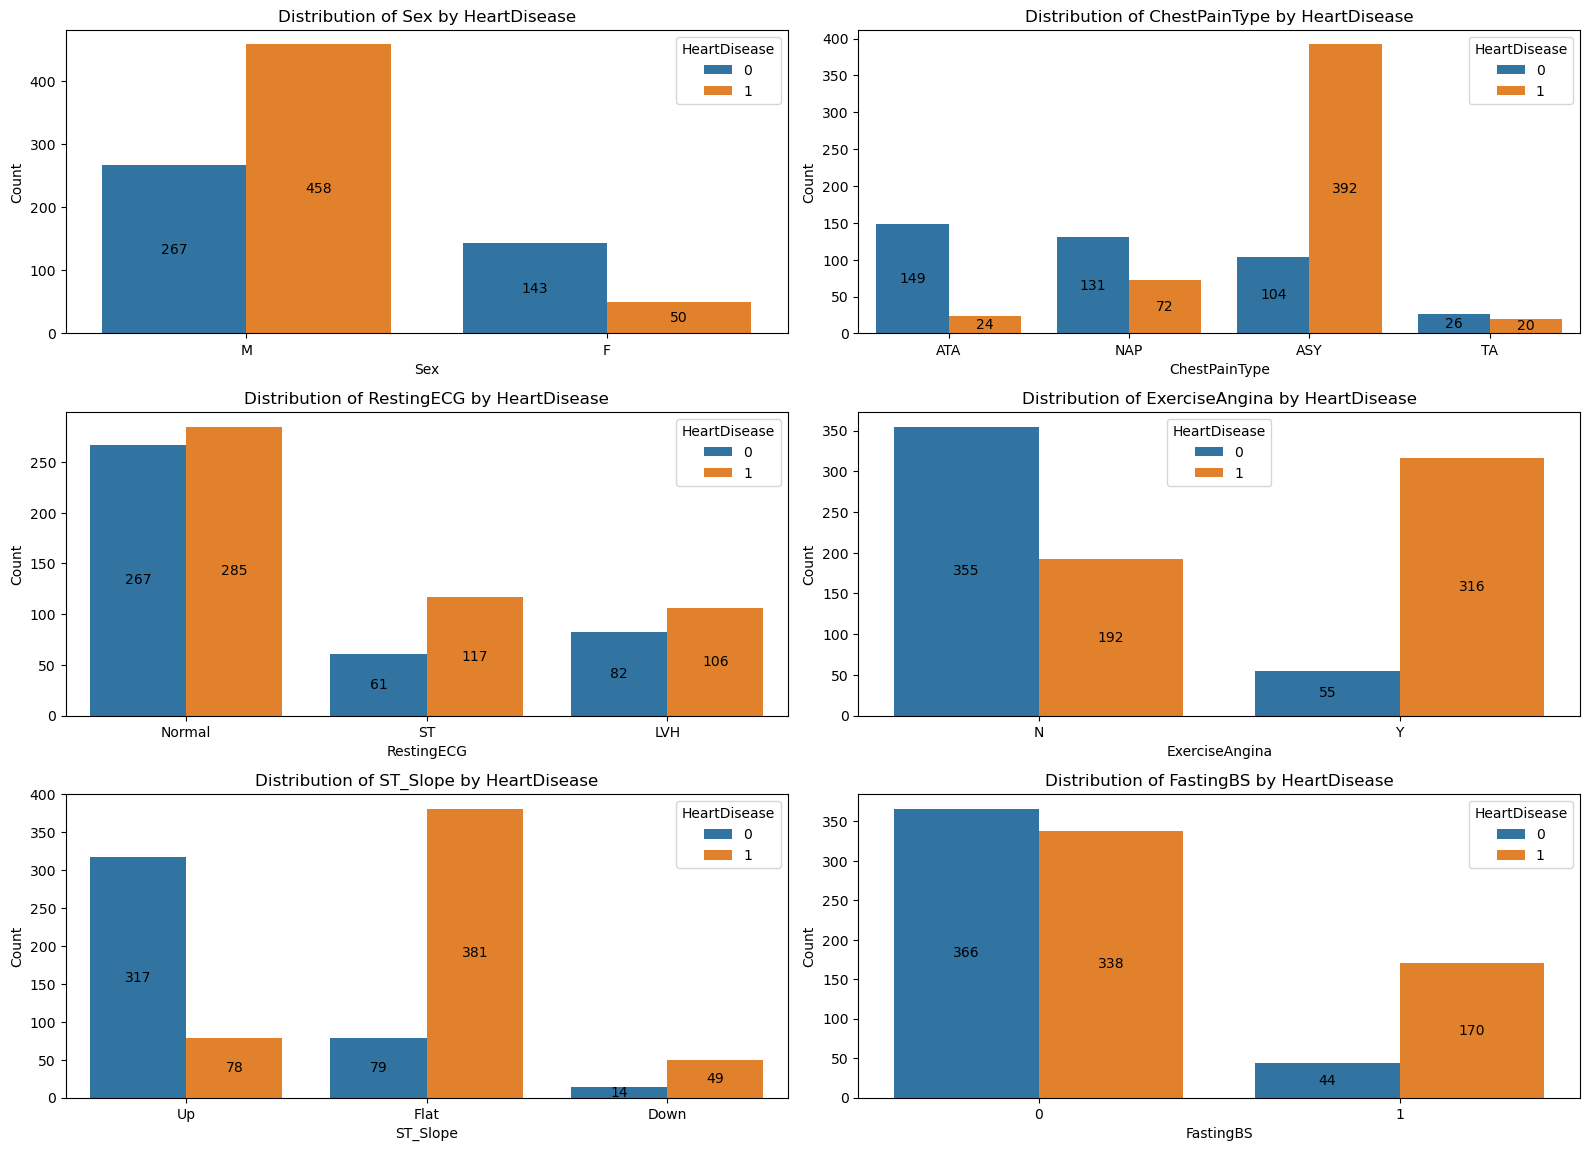

In [15]:
plt.figure(figsize=(16,15))
for index, columns in enumerate(categorical_columns[:-1]):
    ax=plt.subplot(4,2,index+1)
    # group by HeartDisease
    sns.countplot(x=df[columns],hue=df['HeartDisease'],ax=ax)
    plt.title(f"Distribution of {columns} by HeartDisease")
    plt.xlabel(columns)
    plt.ylabel('Count')
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container,label_type='center')
plt.tight_layout()
plt.show()

- **Gender Disparity:** The dataset shows a notable gender disparity in heart disease diagnoses, with 458 males and only 50 females diagnosed with heart disease. This highlights the need for gender-specific analysis and interventions in cardiovascular health.

- **Chest Pain Type:** Among patients diagnosed with heart disease, a significant proportion (392) reported asymptomatic (ASY) chest pain. This suggests the importance of considering additional symptoms or diagnostic measures beyond chest pain alone in identifying heart disease.

- **Blood Sugar Levels:** A considerable number (170) of patients with fasting blood sugar levels greater than 120 mg/dl were diagnosed with heart disease, emphasizing the potential association between elevated blood sugar levels and cardiovascular risk.

- **Exercise-Induced Angina:** A majority (316) of patients diagnosed with heart disease experienced exercise-induced angina. This underscores the significance of evaluating angina symptoms during physical activity as a potential indicator of underlying heart disease.

- **ST Slope:** A significant portion (381) of patients with a flat ST slope were diagnosed with heart disease, indicating a potential correlation between ST segment characteristics and cardiovascular health.

These insights provide valuable context for understanding the relationship between various clinical features and the presence of heart disease within the dataset.


What percentage of patients with heart disease are male and over 50 years old?

In [22]:
number_of_males_with_heartdisease=458

# Number of males with heart disease who are over 50 years old
males_over_50_with_hd=df[(df['Sex']=='M') &  (df['Age']>50) & (df['HeartDisease']==1)]['Sex'].count()
males_over_50_with_hd

# Percentage of males with heart disease who are over 50 years old
percentage_male_over_50_with_hd= (males_over_50_with_hd*100)/ number_of_males_with_heartdisease
print(f"Percentage of patients with heart disease are male and over 50 years old: {percentage_male_over_50_with_hd:.2f}%")

Percentage of patients with heart disease are male and over 50 years old: 75.11%


What is the median age of patients who were diagnosed with heart disease?

In [24]:
medain_age_hd=df[df['HeartDisease']==1]['Age'].median()
print(f"The median age of patients who were diagnosed with heart disease is: {medain_age_hd}")

The median age of patients who were diagnosed with heart disease is: 57.0


# Data Cleaning

We identified that there are no missing values. However, as we noticed earlier, a couple of columns have 0 values which don't make sense.

We will look at how many zero values `RestingBP` and `Cholesterol` contain and decide how to handle those.

In [25]:
zero_resting_bp_count=df[df['RestingBP']==0]
zero_resting_bp_count

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [26]:
zero_Cholesterol_count=df[df['Cholesterol']==0]
zero_Cholesterol_count

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


`RestingBP` has only one zero value. We can remove that row from consideration. There are `172` zero values for `Cholesterol`. That's a relatively high number. We can't remove them all and replacing those values with the median might not be an ideal approach, but that's what we will go for now.

To be more accurate, we will replace the zero values in `Cholesterol` in relation to `HeartDisease`. So, the 0 values in `Cholesterol` for patients who were diagnosed with a heart disease will be replaced by the median of the non-zero values for patients who were diagnosed with a heart disase. And we'll do the same for those who were not diagnosed with a heart disease.

In [27]:
clean_df=df.copy()

In [28]:
# only keep non-zero values for RestingBP
clean_df=df[df['RestingBP']!=0]

In [29]:
heartdisease_mask=clean_df['HeartDisease']==0

In [30]:
cholesterol_without_heartdisease = clean_df.loc[heartdisease_mask, "Cholesterol"]
cholesterol_with_heartdisease = clean_df.loc[~heartdisease_mask, "Cholesterol"]

In [31]:
clean_df.loc[heartdisease_mask, "Cholesterol"] = cholesterol_without_heartdisease.replace(to_replace = 0, value = cholesterol_without_heartdisease.median())
clean_df.loc[~heartdisease_mask, "Cholesterol"] = cholesterol_with_heartdisease.replace(to_replace = 0, value = cholesterol_with_heartdisease.median())

In [32]:
clean_df[['Cholesterol','RestingBP']].describe()

,Cholesterol,RestingBP
count,917.000000,917.000000
mean,239.700109,132.540894
std,54.352727,17.999749
min,85.000000,80.000000
25%,214.000000,120.000000
50%,225.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


The minimum values for both have changed! There are no more zero values in either of those.

# Feature Selection

Thanks to our EDA and a general understanding of the features, we can identify some of the features that we could start with:

* `Age`

* `Sex`

* `ChestPainType`

* `Cholesterol`

* `FastingBS`

We will also identify how stronly the feature columns are correlated to the target colummn. That should help us narrow down on the features.



In order to do that, we will first convert our categorical columns into dummy variables.

In [33]:
clean_df=pd.get_dummies(data=clean_df,drop_first=True)
clean_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


Now, we can find how they are correlated.

In [34]:
correlation=abs(clean_df.corr())
correlation

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.263084,0.026756,0.198170,0.382280,0.258563,0.282012,0.055670,0.218113,0.011681,0.032083,0.230793,0.136903,0.216017,0.185499,0.258027
RestingBP,0.263084,1.000000,0.092169,0.067823,0.109693,0.174252,0.117990,0.009427,0.051374,0.027536,0.049464,0.113759,0.089156,0.153064,0.110171,0.105969
Cholesterol,0.026756,0.092169,1.000000,0.023912,0.037959,0.057086,0.024914,0.132268,0.020929,0.053205,0.038277,0.046147,0.049264,0.058131,0.067999,0.055602
FastingBS,0.198170,0.067823,0.023912,1.000000,0.131067,0.053062,0.267994,0.120424,0.140844,0.038201,0.026752,0.092588,0.126853,0.059988,0.107683,0.162346
MaxHR,0.382280,0.109693,0.037959,0.131067,1.000000,0.161213,0.401410,0.189668,0.254214,0.133411,0.100235,0.023181,0.157561,0.370023,0.343641,0.384339
Oldpeak,0.258563,0.174252,0.057086,0.053062,0.161213,1.000000,0.403638,0.105444,0.261903,0.107615,0.032382,0.117293,0.056283,0.409494,0.282874,0.450299
HeartDisease,0.282012,0.117990,0.024914,0.267994,0.401410,0.403638,1.000000,0.305118,0.401680,0.215311,0.054591,0.092452,0.103067,0.495490,0.553700,0.621843
Sex_M,0.055670,0.009427,0.132268,0.120424,0.189668,0.105444,0.305118,1.000000,0.161294,0.067682,0.003903,0.011098,0.064009,0.191226,0.115596,0.150537
ChestPainType_ATA,0.218113,0.051374,0.020929,0.140844,0.254214,0.261903,0.401680,0.161294,1.000000,0.256306,0.110817,0.108422,0.046381,0.300947,0.304346,0.357324
ChestPainType_NAP,0.011681,0.027536,0.053205,0.038201,0.133411,0.107615,0.215311,0.067682,0.256306,1.000000,0.122150,0.003352,0.041317,0.164722,0.074256,0.095585


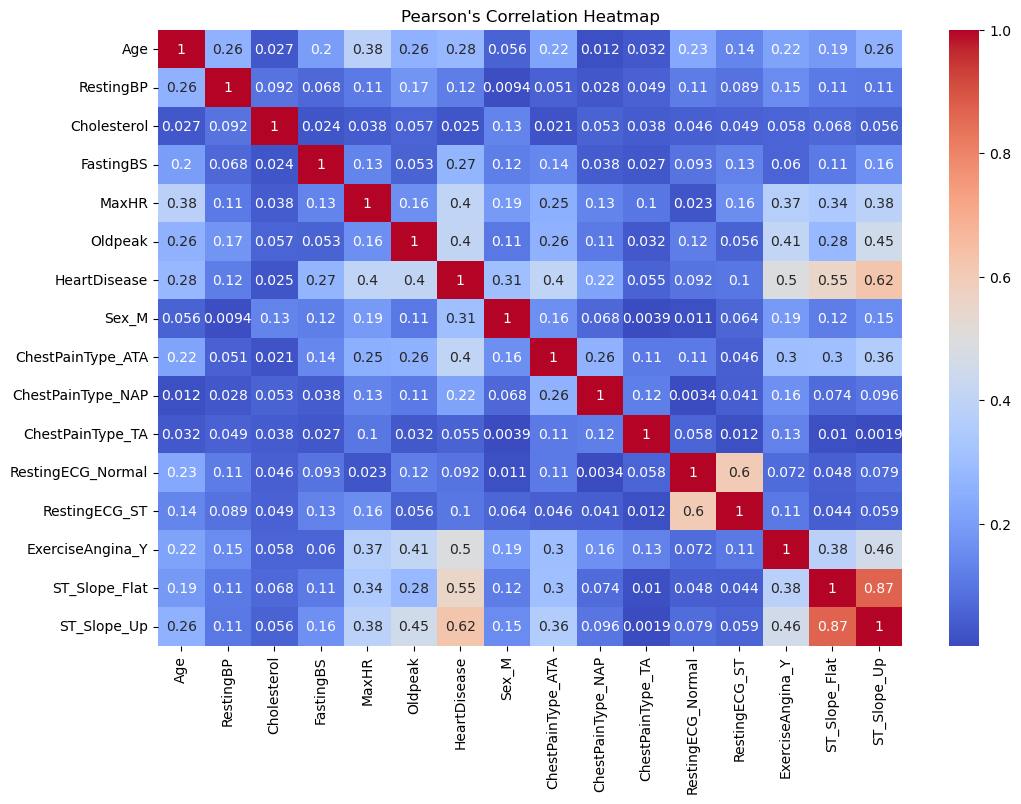

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title("Pearson's Correlation Heatmap")
plt.show()

<Axes: >

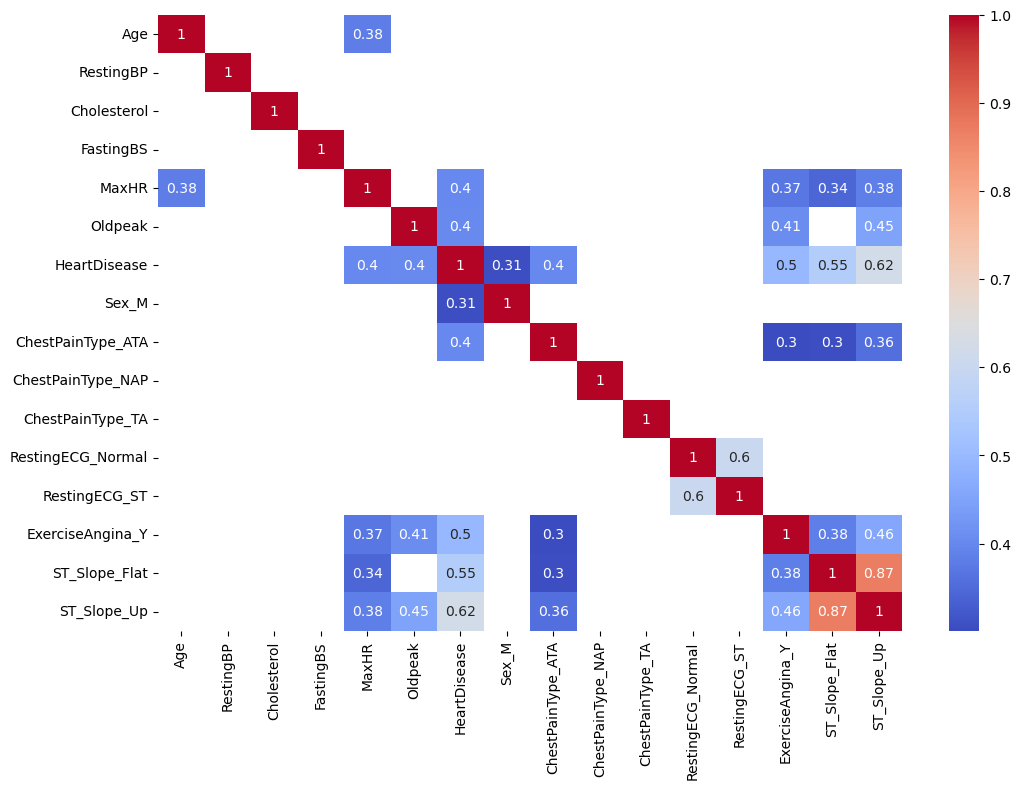

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation[correlation > 0.3], annot=True, cmap="coolwarm")

From our correlation heatmap, we can identify the following features to be positively correlated (correlation coefficient greater than 0.3) to `HeartDisease`:

* `Oldpeak`

* `MaxHR`

* `ChestPainType_ATA`

* `ExerciseAngina_Y`

* `ST_Slope_Flat`

* `ST_Slope_Up`

The correlation coefficient threshold was chosen arbitrarily. Surprisingly, `Cholesterol` is not strongly correlated to `HeartDisease`. We can consider ignoring the feature for now.

Given everything we have attempted so far, we can narrow down our features to the following:

* `Oldpeak`

* `Sex_M`
   * It has a relatively low value for the coefficient, but given what we observed in our EDA, let's also take it into account.
   
* `ExerciseAngina_Y`

* `ST_Slope_Flat`

* `ST_Slope_Up`

Time to create our model using these features!

# Building a Classifier with One Feature

We will split our dataset into a training and a test set first.

In [37]:
X=clean_df.drop(['HeartDisease'],axis=1)
y=clean_df['HeartDisease']

In [38]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.15,random_state=417)

In [39]:
features = ["Oldpeak","Sex_M","ExerciseAngina_Y","ST_Slope_Flat","ST_Slope_Up"]

We will start with creating a model for each of the features above and evaluate their performance using accuracy as a metric.

In [40]:
for feature in features:
    model=KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train[[feature]],y_train)
    y_pred=model.predict(X_val[[feature]])
    accuracy=accuracy_score(y_pred,y_val)
    print(f"The k-NN classifier trained on {feature} and with k = 3 has an accuracy of  {accuracy*100:.2f}%")

The k-NN classifier trained on Oldpeak and with k = 3 has an accuracy of  78.26%
The k-NN classifier trained on Sex_M and with k = 3 has an accuracy of  61.59%
The k-NN classifier trained on ExerciseAngina_Y and with k = 3 has an accuracy of  73.19%
The k-NN classifier trained on ST_Slope_Flat and with k = 3 has an accuracy of  81.88%
The k-NN classifier trained on ST_Slope_Up and with k = 3 has an accuracy of  84.06%


Based on the provided accuracies, the k-NN classifier trained on the feature `ST_Slope_Up` with k = 3 achieved the highest accuracy of `84.06%`. This indicates that using `ST_Slope_Up` as a feature resulted in the most accurate predictions compared to the other selected features.

We will train a model using all of these features next.

# Building a Classifier with Multiple Features

Before training on all of the above features, we need to normalize the data first. We will use scikit-learn's MinMaxScaler to scale the values between 0 and 1, and then train the model again.

In [41]:
scaler=MinMaxScaler()

In [42]:
X_train_scaled=scaler.fit_transform(X_train[features])
X_val_scaled=scaler.transform(X_val[features])

In [43]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_val_scaled)
accuracy=accuracy_score(y_pred,y_val)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 84.06


The model's accuracy is 84.06%! That's not a significant improvement, but still a good start. Using all these features results in an improved model, but, let's see what parameters/hyperparameters might be optimal.

# Hyperparameter Optimization

Let's prepare our data first.

In [73]:
X=clean_df.drop(['HeartDisease'],axis=1)
y=clean_df['HeartDisease']

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=417)

In [75]:
features = ["Oldpeak","Sex_M","ExerciseAngina_Y","ST_Slope_Flat","ST_Slope_Up"]

In [76]:
scaler=MinMaxScaler()

In [77]:
X_train_scaled=scaler.fit_transform(X_train[features])

We will use grid search to explore the following range of values for a couple of hyperparameters:

* For `k` (`n_neighbors` in scikit-learn) we will use values in the range of 1 to 20.
* We will use two distance metrics - `minkwoski` and `manhattan`.

`minkwoski` is the default metric for KNeighborsClassifier in sklearn, so we don't expect `manhattan` to do better. But, let's see what happens

In [78]:
grid_params = {"n_neighbors": range(1, 20),
                "metric": ["minkowski", "manhattan"]
              }

In [79]:
model=KNeighborsClassifier()

In [80]:
grid_search=GridSearchCV(estimator=model,param_grid=grid_params,scoring='accuracy')

In [81]:
grid_search.fit(X_train_scaled,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': range(1, 20)},
             scoring='accuracy')

In [86]:
best_score=grid_search.best_score_*100
print(f"Best Score: {best_score}")

Best Score: 83.18114143920594


In [87]:
best_parameters=grid_search.best_params_
print(f"Best Parameters: {best_parameters}")

Best Parameters: {'metric': 'minkowski', 'n_neighbors': 16}


Our best model had an accuracy of ~`83%` with `16` n_neighbors and `minkowski` as the distance metric.

The accuracy of this model is only slightly better. Since `GridSearchCV` employs a cross-validation approach, it is reasonable to assume that this is a better estimate of how the model performs compared to our prior attempt.

We will evaluate our model on our test set now.

# Model Evaluation on Test Set

We need to first normalize our test set similar to how we scaled our training set.

In [88]:
X_test_scaled=scaler.transform(X_test[features])

In [90]:
y_pred=grid_search.best_estimator_.predict(X_test_scaled)

In [94]:
accuracy=accuracy_score(y_pred,y_test)
print(f"Model Accuracy on test set: {accuracy*100:.2f}%")

Model Accuracy on test set: 87.68%


Our model got an accuracy of ~ `88`%.That's really good! This means that our model is likely to correctly predict whether a patient is at risk for a heart disease ~ `88`% of the time.

However, the accuracy being higher than the one before raises some flags.

One explanation that could explain is to look at how the data is distributed.

In [95]:
print("Distribution of patients by their sex in the entire dataset")
print(X.Sex_M.value_counts())

Distribution of patients by their sex in the entire dataset
1    724
0    193
Name: Sex_M, dtype: int64


In [96]:
print("\nDistribution of patients by their sex in the training dataset")
print(X_train.Sex_M.value_counts())


Distribution of patients by their sex in the training dataset
1    615
0    164
Name: Sex_M, dtype: int64


In [97]:
print("\nDistribution of patients by their sex in the test dataset")
print(X_test.Sex_M.value_counts())


Distribution of patients by their sex in the test dataset
1    109
0     29
Name: Sex_M, dtype: int64


We used `Sex` as one of our features for training the model.

* `X` had `724` males and `193` females.
* `X_train` had `615` males and `164` females.
* `X_test` had `109` males and `29` females.

We can see that the above datasets have a significantly higher number of male patients than female ones. We briefly mentioned previously that this could present a bias because of this imbalance in our dataset and we can see it potentially impacts our model. If the test dataset doesn't have that many female patients and the model was trained on a dataset with more male patients, then it is understandable it has better accuracy on the test set. Of course, there could be other factors contributing to this discrepancy.

# Summary

Our final model was trained using the following features:

* Oldpeak
* Sex_M
* ExerciseAngina_Y
* ST_Slope_Flat
* ST_Slope_Up

and had a test set accuracy of `87.68`%. However, given the limitations of our data this accuracy might not be indicative of a well performing model.
